### Chapter 1: Introduction

In [110]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Example: Polynomial Curve Fitting

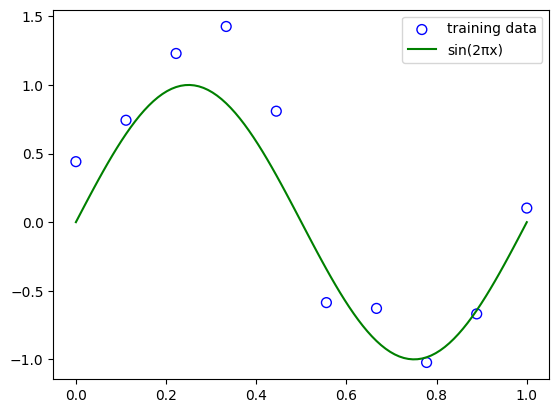

In [111]:
# Create a function to generate 20 data points from a sine wave with Gaussian noise
def generate_data(func, n, std, random_seed=0):
    np.random.seed(random_seed) # Set a random seed for reproducibility
    X = np.linspace(0, 1, n) # Create n evenly spaced points between 0 and 1
    t = func(X) + np.random.normal(scale=std, size=n) # Create n target values with Gaussian noise of std
    return X, t

def func(x):
    return np.sin(2*np.pi*x) # Create a sine wave function with x as the input, x can be a scalar or a vector


x_train, y_train = generate_data(func,10,0.25) # Generate 20 data points from a sine wave with Gaussian noise
x_test = np.linspace(0, 1, 100) # Create 100 evenly spaced points between 0 and 1
y_test = func(x_test) # Create 100 target values without noise
y_test_2 = generate_data(func,100,0.25)[1] # Create 100 target values with noise

# Create a function to plot the data and the sine wave
def plot_data(X, t, x, y, label1="training data", label2 = "sin(2πx)"):
    plt.scatter(X, t, facecolor="none", edgecolor="b", s=50, label=label1) # s means size, facecolor means the color of the dots, edgecolor means the color of the edge of the dots
    plt.plot(x, y, c="g", label=label2) # c means color
    #plt.scatter(x,generate_data(func,100,0.1)[1],facecolor="none", edgecolor="b", s=50, label="training data")
    plt.legend()
    plt.show()

plot_data(x_train, y_train, x_test, y_test) # Plot the data and the sine wave

In [112]:
# Create a function to perform polynomial regression
def fit_polynomial(x, t, M):
    X = np.array([x**m for m in range(M+1)]).T # Create a Vandermonde matrix of x
    w = np.linalg.solve(X.T.dot(X), X.T.dot(t)) # Solve the normal equation to get the weights
    return w

In [143]:
W = fit_polynomial(x_test, y_test_2, 10) # Perform polynomial regression with M=3
W

array([ 3.68418178e-01,  7.49720470e-01,  5.05233258e+01, -4.36035944e+02,
        2.44910502e+03, -9.97178919e+03,  2.55013792e+04, -3.95131679e+04,
        3.61948030e+04, -1.80589146e+04,  3.78311400e+03])

In [144]:
# Create a function to predict the target values
def predict_polynomial(x, w):
    M = len(w)-1  # Get the order of the polynomial
    y = np.zeros_like(x) # Create an empty vector of the same size as x
    for m in range(M+1): #For total number of terms
        y += w[m] * x**m # Calculate each term of the polynomial
    return y

y_predicted = predict_polynomial(x_test, W) # Predict the target values of the test data
#y_predicted

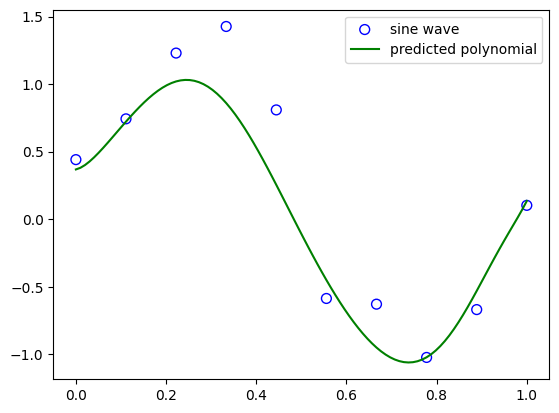

In [145]:

plot_data(x_train,y_train, x_test, y_predicted,label1="sine wave",label2="predicted polynomial") # Plot the data and the predicted polynomial

In [116]:
# Create a function to calculate the root mean squared error
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

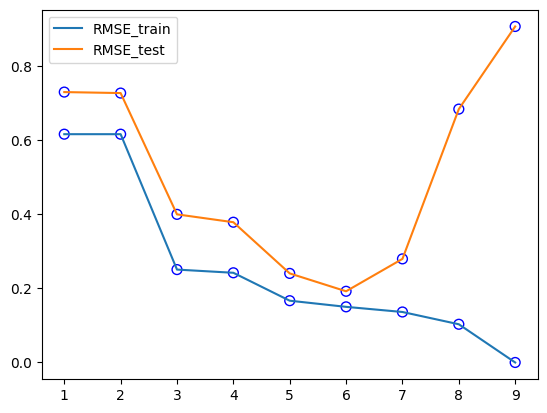

In [160]:
def rmse_plot(x_train, y_train, x_test, y_test, func=fit_polynomial):
    rmse_train_set, rmse_test_set = [],[] # Create numpy arrays to store the RMSE of the training and test data
    for i in range(1,10):
        W_train= func(x_train, y_train, i) # Perform polynomial regression with M in range 1 to 9
        y_predicted_train, y_predicted_test = predict_polynomial(x_train, W_train), predict_polynomial(x_test[:10], W_train) # Predict the target values of the test data
        rmse_train, rmse_test = rmse(y_train, y_predicted_train), rmse(y_test[:10], y_predicted_test) # Calculate the RMSE of the training and test data
        rmse_train_set.append(rmse_train), rmse_test_set.append(rmse_test) # Append the RMSE to the numpy arrays
    return np.array(rmse_train_set), np.array(rmse_test_set)

rmse_train_set, rmse_test_set = rmse_plot(x_train, y_train, x_test, y_test) # Plot the RMSE of the training and test data for each M
plt.scatter(range(1,10), rmse_train_set,facecolor="none", edgecolor="b", s=50)
plt.plot(range(1,10), rmse_train_set,  label="RMSE_train") 
plt.scatter(range(1,10), rmse_test_set,facecolor="none", edgecolor="b", s=50)
plt.plot(range(1,10), rmse_test_set, label="RMSE_test")
plt.legend()
plt.show()

In [161]:
# Create a function to perform polynomial regression with regularization
def fit_polynomial_regularized(x, t, M, alpha=np.exp(-18)):
    X = np.array([x**m for m in range(M+1)]).T # Create a Vandermonde matrix of x
    w = np.linalg.solve(alpha*np.eye(M+1) + X.T.dot(X), X.T.dot(t)) # Solve the normal equation to get the weights, 
    # θ=inv(X.T.X+λL).X.T.y, where L is the identity matrix with the first element set to 0
    return w

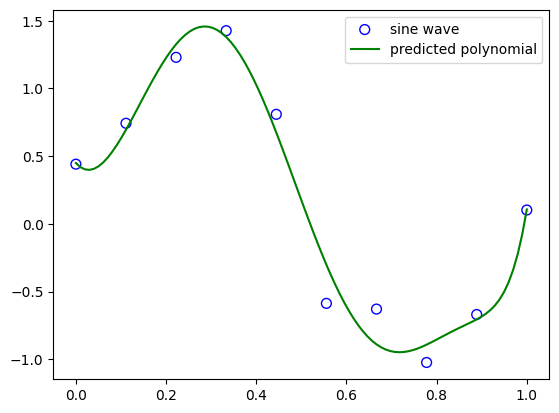

In [162]:
W = fit_polynomial_regularized(x_train, y_train, 9, np.exp(-18)) # Perform polynomial regression with M=9 and alpha=np.exp(-18)
# If the regularization term is too large, the model will underfit the data, as illustrated when alpha=0.1
# alpha = np.exp(-18) gives similar curves for aLL M, ie. it is a good value for alpha
# if the regularization term is too small, the model will overfit the data, as illustrated when alpha=np.exp(-100)
predicted_polynomial = predict_polynomial(x_test, W) # Predict the target values of the test data

plot_data(x_train, y_train, x_test, predicted_polynomial, label1="sine wave", label2="predicted polynomial") # Plot the data and the predicted polynomial


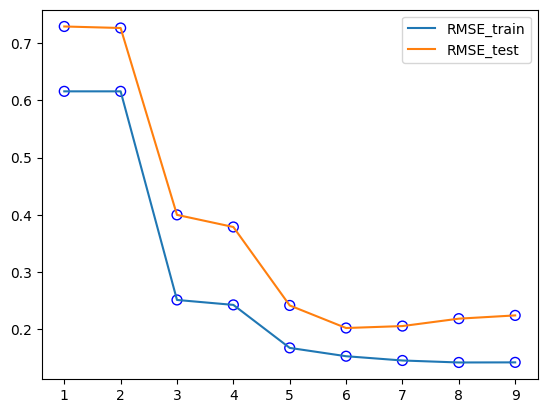

In [163]:
# Comparative RMSE analysis for regularized polynomial regression
rmse_train_set, rmse_test_set = rmse_plot(x_train, y_train, x_test, y_test, fit_polynomial_regularized) # Plot the RMSE of the training and test data for each M
plt.scatter(range(1,10), rmse_train_set,facecolor="none", edgecolor="b", s=50)
plt.plot(range(1,10), rmse_train_set,  label="RMSE_train") 
plt.scatter(range(1,10), rmse_test_set,facecolor="none", edgecolor="b", s=50)
plt.plot(range(1,10), rmse_test_set, label="RMSE_test")
plt.legend()
plt.show()